In [6]:
import zipfile
import pandas as pd

# Path to the downloaded ZIP file
zip_file_path = "C:\\Users\\vvais\\Downloads\\house-prices-advanced-regression-techniques.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Load the specific CSV file
    with zip_ref.open('train.csv') as file:
        df = pd.read_csv(file)

# Display the first few rows of the DataFrame
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
# Select the relevant columns
features = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = df['SalePrice']


In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2806426667.247852
R-squared: 0.6341189942328374


In [11]:
# Check for missing data
print(features.isnull().sum())

# Drop rows with missing values
features = features.dropna()
target = target[features.index]


GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [12]:
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])

print(coefficients)

               Coefficient
GrLivArea       104.026307
BedroomAbvGr -26655.165357
FullBath      30014.324109


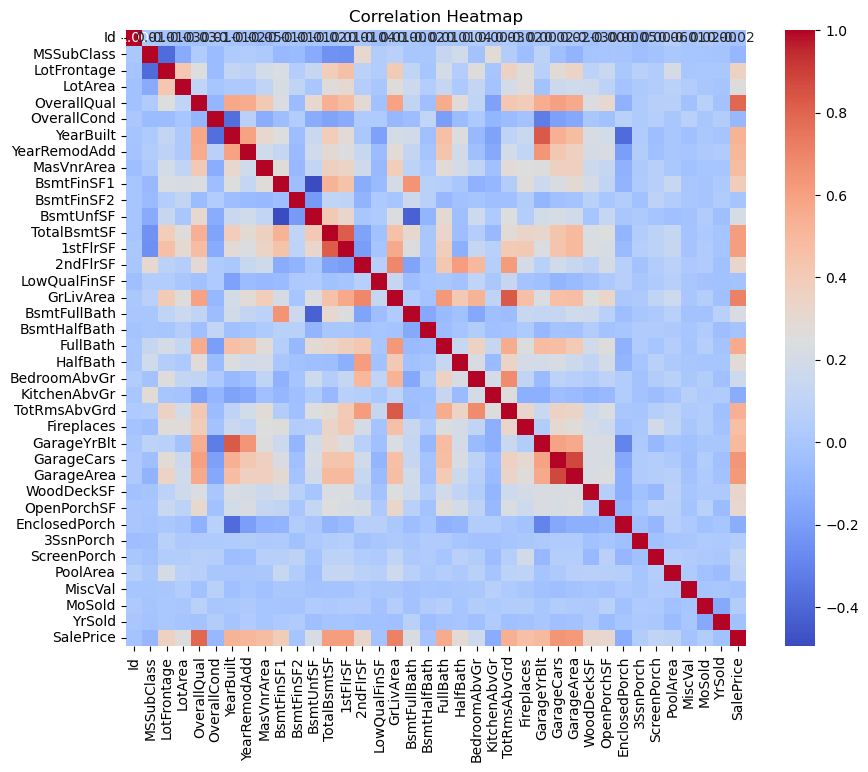

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

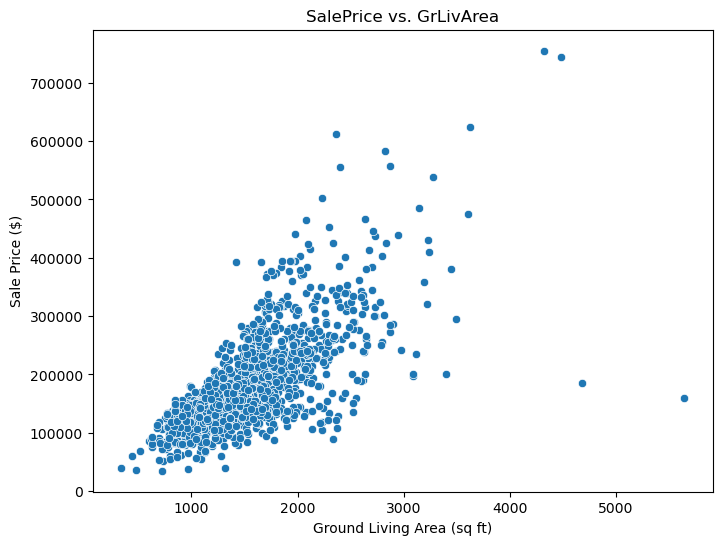

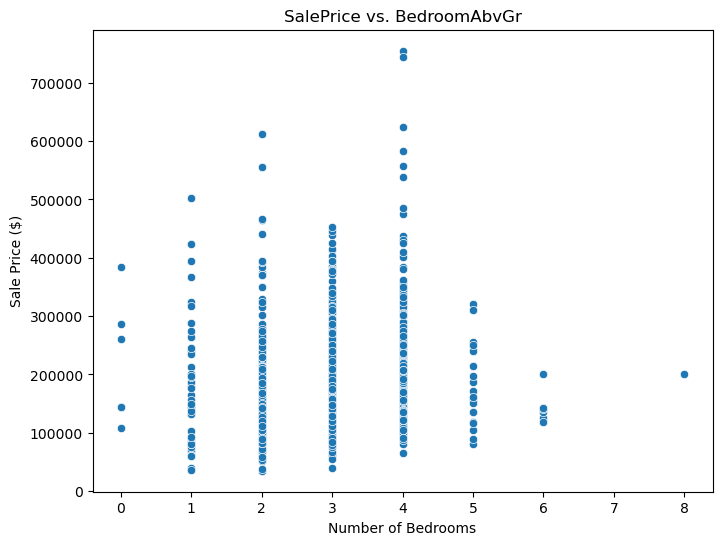

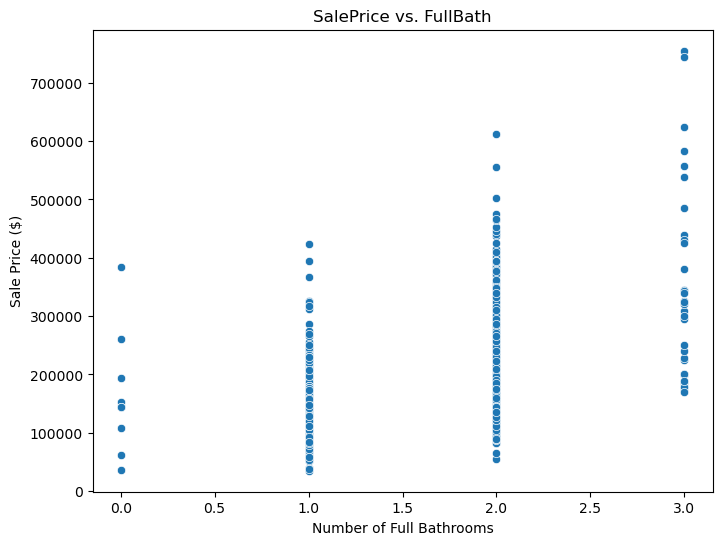

In [14]:
# Scatter plot between SalePrice and GrLivArea (Ground Living Area)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# Scatter plot between SalePrice and BedroomAbvGr (Number of Bedrooms)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BedroomAbvGr'], y=df['SalePrice'])
plt.title('SalePrice vs. BedroomAbvGr')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($)')
plt.show()

# Scatter plot between SalePrice and FullBath (Number of Full Bathrooms)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['FullBath'], y=df['SalePrice'])
plt.title('SalePrice vs. FullBath')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price ($)')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


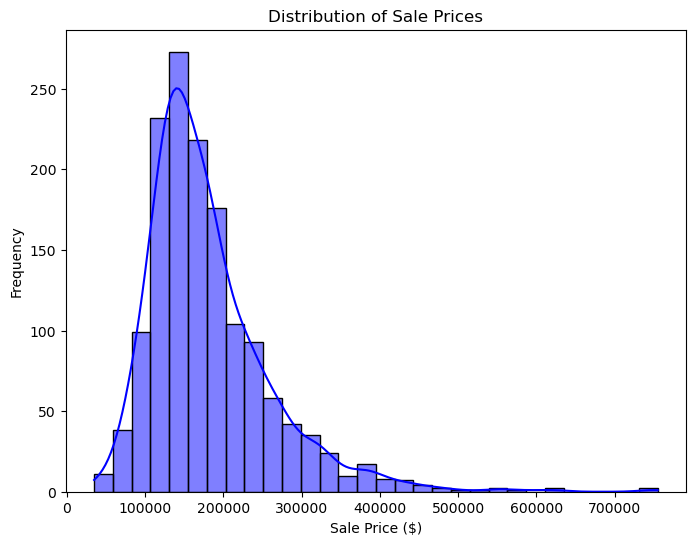

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


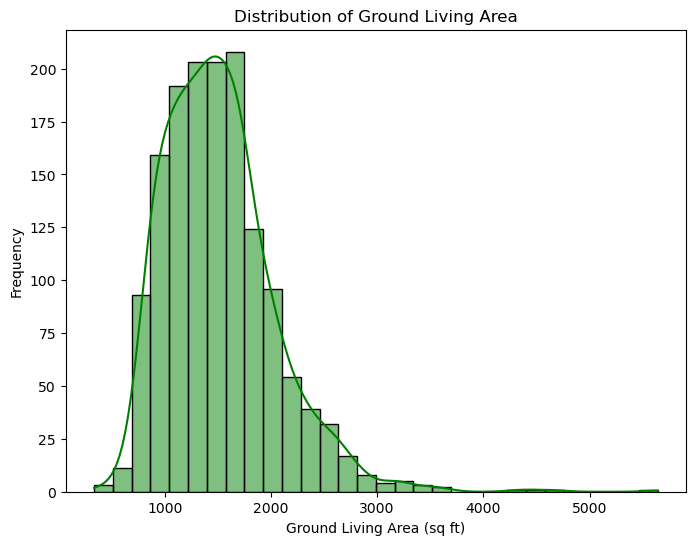

In [15]:
# Distribution plot for SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

# Distribution plot for GrLivArea
plt.figure(figsize=(8, 6))
sns.histplot(df['GrLivArea'], kde=True, color='green', bins=30)
plt.title('Distribution of Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Frequency')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

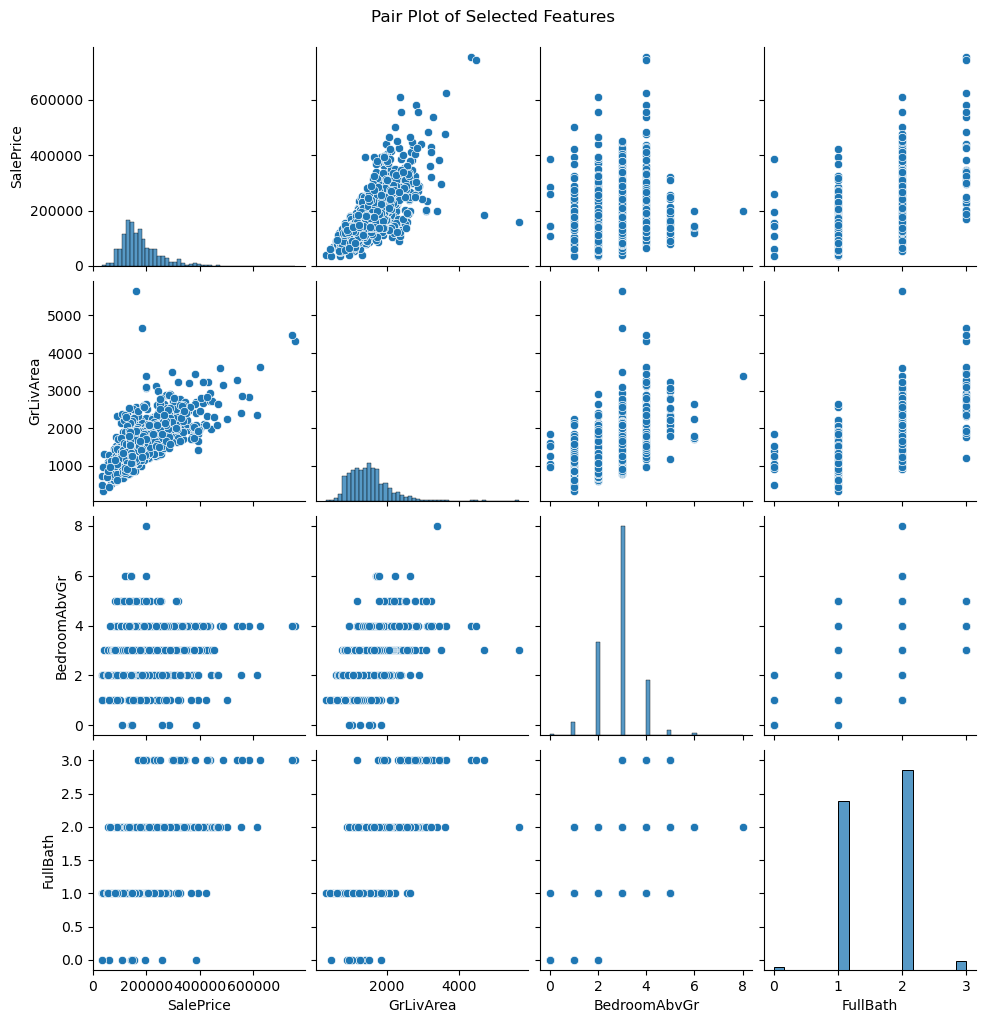

In [16]:
# Select a subset of features
subset = df[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Pair plot
sns.pairplot(subset)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()